<a href="https://colab.research.google.com/github/Muzaffar2106/IBP-Assignment-2/blob/main/Final_work_download_enron_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading Enron Email Data



### Full/Complete Dataset

The following code-cell will download the complete Enron email database to the Colab instance.  It will take about 1-2 mins to download.

In [ ]:
#run wget command for downloding enrn email data 
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2023-05-23 17:52:00--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2023-05-23 17:52:02--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/Teaching/ISYS2001/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  49.2MB/s    in 25s     

2023-05-23 17:52:28 (32.

In [ ]:
#import library sqlite3
import sqlite3

In [ ]:
#establish connection with database
conn = sqlite3.connect("enron.db")

In [ ]:
#create cursor object
cur = conn.cursor()

In [ ]:
#check schema of database
sql = """
SELECT name
FROM sqlite_master
WHERE type = 'table';
"""
cur.execute (sql)
cur.fetchall() 

[('employeelist',), ('message',), ('recipientinfo',), ('referenceinfo',)]

In [ ]:
#Check Schema of table employeelist using PRAGMA
sql="""
PRAGMA table_info('employeelist');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'eid', 'INTEGER', 1, None, 1),
 (1, 'firstName', 'VARCHAR(31)', 1, "''", 0),
 (2, 'lastName', 'VARCHAR(31)', 1, "''", 0),
 (3, 'Email_id', 'VARCHAR(31)', 1, "''", 0),
 (4, 'Email2', 'VARCHAR(31)', 0, None, 0),
 (5, 'Email3', 'VARCHAR(31)', 0, None, 0),
 (6, 'EMail4', 'VARCHAR(31)', 0, None, 0),
 (7, 'folder', 'VARCHAR(31)', 1, "''", 0),
 (8, 'status', 'VARCHAR(50)', 0, None, 0)]

In [ ]:
#Check Schema of table message using PRAGMA
sql="""
PRAGMA table_info('message');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'mid', 'INTEGER', 1, "'0'", 1),
 (1, 'sender', 'VARCHAR(127)', 1, "''", 0),
 (2, 'date', 'DATETIME', 0, None, 0),
 (3, 'message_id', 'VARCHAR(127)', 0, None, 0),
 (4, 'subject', 'TEXT', 0, None, 0),
 (5, 'body', 'TEXT', 0, None, 0),
 (6, 'folder', 'VARCHAR(127)', 1, "''", 0)]

In [ ]:
#Check Schema of table recipientinfo using PRAGMA
sql="""
PRAGMA table_info('recipientinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'rtype', 'TEXT', 0, None, 0),
 (3, 'rvalue', 'VARCHAR(127)', 0, None, 0),
 (4, 'dater', 'DATETIME', 0, None, 0)]

In [ ]:
#Check Schema of table referenceinfo using PRAGMA
sql="""
PRAGMA table_info('referenceinfo');
"""

cur.execute(sql)
cur.fetchall()

[(0, 'rfid', 'INTEGER', 1, "'0'", 1),
 (1, 'mid', 'INTEGER', 1, "'0'", 0),
 (2, 'reference', 'TEXT', 0, None, 0)]

#**Email Traffic Overtime**

In [ ]:
#import library - pandas
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
#check date format by writing an sql query to fetch one record from message table
#write sql query
sql = """
SELECT date
FROM Message
"""
#convert to dataframe
import pandas as pd
message_df = pd.read_sql_query(sql, conn)
message_df

,date
0,2000-01-21 04:51:00
1,2000-01-24 01:37:00
2,2000-01-24 02:06:00
3,2000-02-02 10:21:00
4,2000-02-07 22:16:00
...,...
252754,2002-02-06 16:51:29
252755,2002-02-06 17:17:39
252756,2002-02-06 20:09:37
252757,2002-02-07 04:38:13


In [ ]:
#sql query to count number of emails per day
sql = """
SELECT strftime('%Y-%m-%d', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
#convert in dataframe
messageperday_df = pd.read_sql_query(sql, conn)
messageperday_df

,date,count
0,0001-05-30,2
1,0001-06-18,1
2,0001-07-24,1
3,0001-08-01,1
4,0001-08-06,1
...,...,...
194082,2020-12-29,1
194083,2043-12-28,1
194084,2044-01-02,1
194085,2044-01-04,1


<Axes: xlabel='date', ylabel='count'>

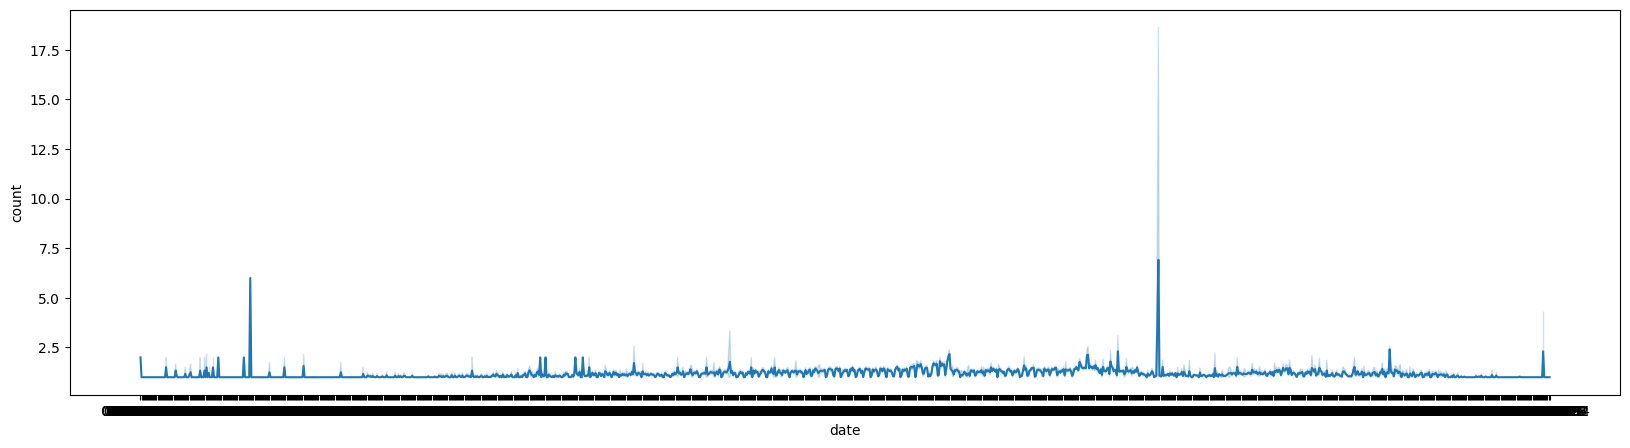

In [ ]:
#plot graph
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y = 'count', data = messageperday_df)

**Analysis for message per day** 

The resulting graph shows the Enron Corporation's daily routine of email exchange. The graph's highs and lows show times when daily email activity grew or decreased. It can assist in locating important occasions or intervals that significantly affected email volume. 


In [ ]:
#sql query to count number of emails per week
sql = """
SELECT strftime('%Y-%m-%w', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
#convert in dataframe
messageperweek_df = pd.read_sql_query(sql, conn)
messageperweek_df

,date,count
0,0001-05-3,2
1,0001-06-1,1
2,0001-07-2,1
3,0001-08-3,1
4,0001-08-1,1
...,...,...
194082,2020-12-2,1
194083,2043-12-1,1
194084,2044-01-6,1
194085,2044-01-1,1


<Axes: xlabel='date', ylabel='count'>

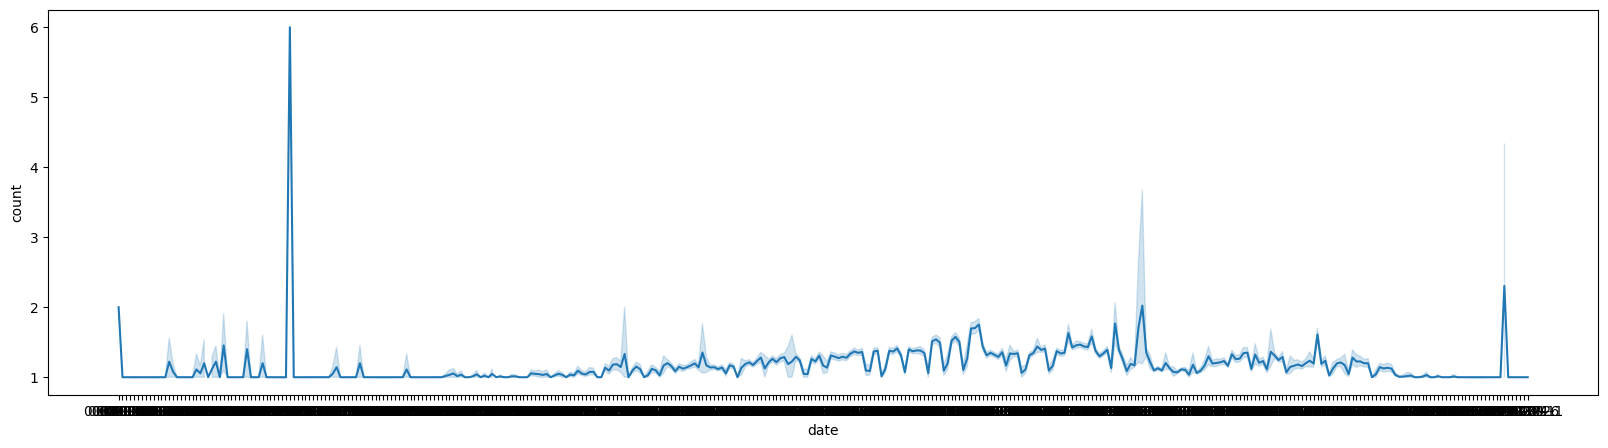

In [ ]:
#plot graph
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y = 'count', data = messageperweek_df)

**Analysis dor message per week**

The graph demonstrates that the mailing cycle experienced a considerable early boost before rapidly and noticeably declining later on. Then, for a brief period in the late cycle, it peaked once more.


In [ ]:
#sql query to count number of emails per month
sql = """
SELECT strftime('%Y-%m', date)
AS date,
COUNT(*) AS count FROM message
GROUP BY date

"""
#convert in dataframe
messagepermonth_df = pd.read_sql_query(sql, conn)
messagepermonth_df

,date,count
0,0001-05,2
1,0001-06,1
2,0001-07,1
3,0001-08,1
4,0001-08,1
...,...,...
194082,2020-12,1
194083,2043-12,1
194084,2044-01,1
194085,2044-01,1


<Axes: xlabel='date', ylabel='count'>

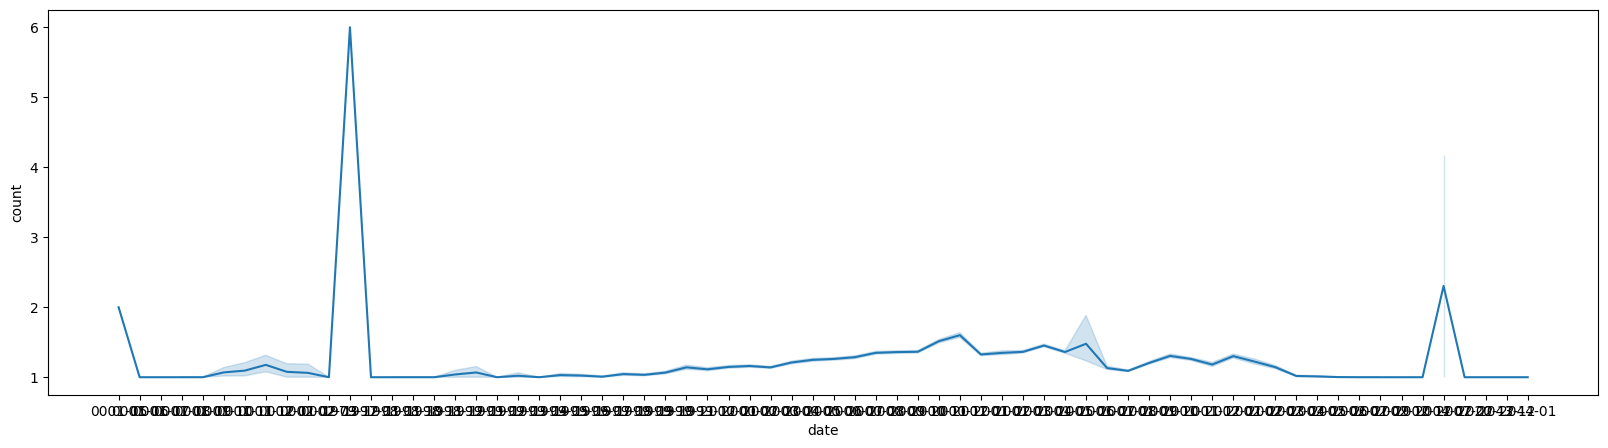

In [ ]:
#plot graph
fig = plt.subplots(figsize=(20,5))
sns.lineplot(x = 'date', y = 'count', data = messagepermonth_df)

**Analysis for message per month**

The monthly graph reveals that the majority of email activity occurred in the early phases of the cycle. As mentioned in the case study, the company's quick growth is what caused the peak in email activity early on.


# Top Senders and Recipients

In [ ]:
#sql query to count the  number of emails by each sender
sql_sender = """
SELECT sender, COUNT (*) AS count
FROM message 
GROUP BY sender
ORDER BY count
DESC
LIMIT 15
"""


In [ ]:
#convert data into dataframe
sender_df = pd.read_sql_query(sql_sender, conn)
sender_df

,sender,count
0,jeff.dasovich@enron.com,6273
1,j.kaminski@enron.com,5838
2,kay.mann@enron.com,5100
3,sara.shackleton@enron.com,4797
4,tana.jones@enron.com,4437
5,chris.germany@enron.com,3686
6,no.address@enron.com,3511
7,enron.announcements@enron.com,2838
8,matthew.lenhart@enron.com,2784
9,debra.perlingiere@enron.com,2549


<Axes: xlabel='count', ylabel='sender'>

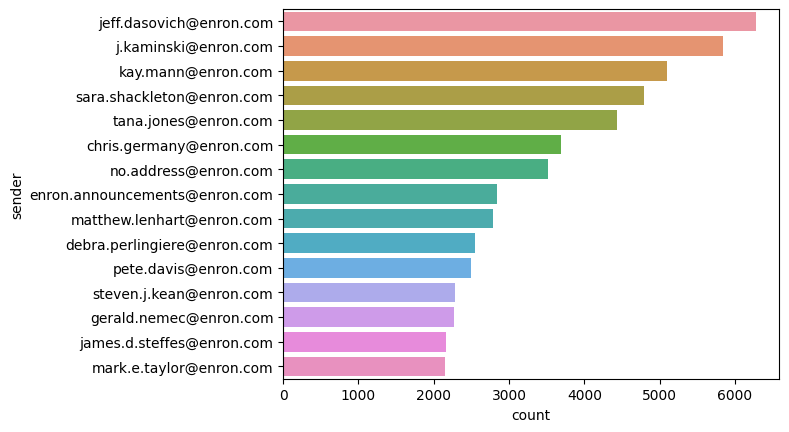

In [ ]:
#plot the dataframe using a bar plot 
sns.barplot(x = 'count', y = 'sender', data = sender_df)

**Analysis for Top senders**

The top 15 senders of the dataset are shown in the bar chart above, with "jeff.dasovish@enron.com" as the top sender with the most emails sent numbered at 6273 emails in total. With precisely 2549 emails sent, "mark.e.taylor@enron.com" has the fewest emails sent among the top 15 senders. With the use of this bar chart, I was able to visually analyze the various participants in the mailing activity and determine who sent the most emails.


In [ ]:
#sql query to count the  number of emails by each recipient
sql_recipient = """
SELECT rvalue as recipient, COUNT (*) AS count
FROM recipientinfo
GROUP BY recipient
ORDER BY count
DESC
LIMIT 10
"""


In [ ]:
#convert data into dataframe
recipient_df = pd.read_sql_query(sql_recipient, conn)
recipient_df

,recipient,count
0,no.address@enron.com,19198
1,jeff.dasovich@enron.com,11137
2,richard.shapiro@enron.com,11015
3,steven.j.kean@enron.com,10873
4,james.d.steffes@enron.com,10615
5,tana.jones@enron.com,9781
6,sara.shackleton@enron.com,9633
7,mark.e.taylor@enron.com,9090
8,louise.kitchen@enron.com,7603
9,pete.davis@enron.com,7509


<Axes: xlabel='count', ylabel='recipient'>

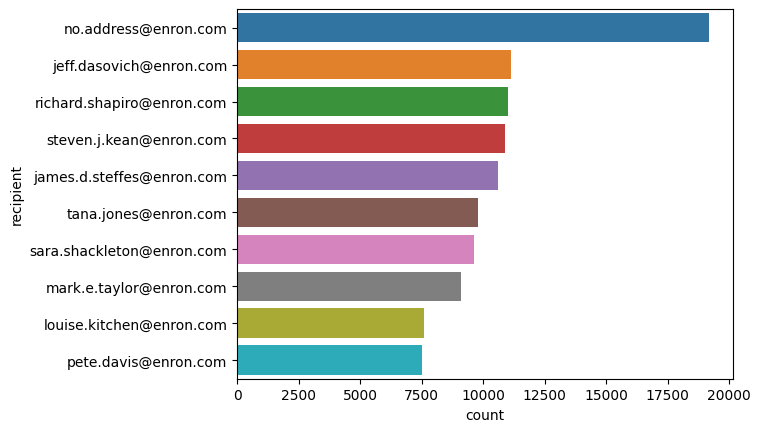

In [ ]:
#plot the dataframe using a bar plot 
sns.barplot(x = 'count', y = 'recipient', data = recipient_df)

**Analysis for top recipients**

The top 10 recipients of the dataset are shown in the bar chart above, with "no.address@enron.com" being the recipient with the greatest number of email received numbering to 19198 emails. In exactly 5049 emails delivered, "pete.davis@enron.com" has the fewest emails among the top 10 receivers. This bar chart made it easier for me to visually analyze the various participants in the emailing activity and determine who obtained the most emails.


# Email Distribution by Recipient Type


In [ ]:
#write sql query to categorize by rtype using count
sql_recipient_type = """
SELECT rtype, COUNT (rtype) AS count
FROM recipientinfo
GROUP BY rtype
ORDER BY rtype
"""

In [ ]:
#convert data in dataframe
recipient_df = pd.read_sql_query(sql_recipient_type, conn)
recipient_df

,rtype,count
0,BCC,253713
1,CC,253735
2,TO,1556994


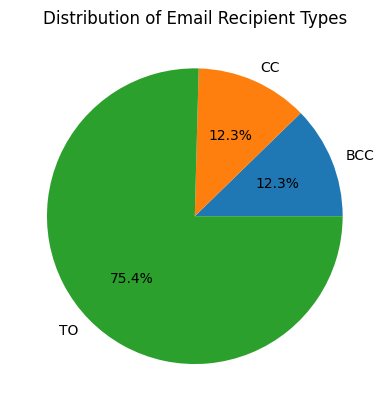

In [ ]:
#create a list of labels for the pie chart
labels = recipient_df["rtype"]

#create a list of values for the pie chart
values_list = recipient_df ["count"] 

#plot the pie chart
plt.pie(values_list, labels=labels, autopct= "%1.1f%%")

plt.title("Distribution of Email Recipient Types")
plt.show()

**Analysis for "TO, CC and BCC"**

By examining the pie chart above, we can see that the "TO" field received the majority of the email distribution (75.4%) while the "CC" and "BCC" fields were evenly dispersed (12.3% each).
